# Econland

### General Context

Econland is a fictional country with a diverse economy comprising manufacturing, services, and finance. The economy shows cyclical patterns of expansion and contraction. Private Investment (PI) is key indicator.

### Structure

+ Period: 40 months (Jan 2022 - Apr 2025)
+ Data Points: 200 headlines (approx. 5 per month)
+ Categories: Positive, Negative, Neutral
+ Target Variables: Private Investment (PI)

### Example Headlines

1. `Positive`: _"Manufacturing Output Surges by 15% Amid Optimism"_

2. `Negative`: _"Economic Uncertainty Dampens Private Investment Prospects"_

3. `Neutral`: _"Government Releases Latest Industrial Output Data"_

### Synthetic PI Data (Hypothetical)

PI will vary based on the sentiment distribution in the news corpus.

The Business Confidence Index (BCI) will be derived using Zero-Shot techniques, then incorporated into a forecasting model as an exogenous variable.

In [1]:
import pandas as pd
import numpy as np

df_corpus = pd.read_parquet("datasets/econland_corpus.parquet")
df_corpus

,date,headline,category,is_financial
0,2022-01-01,Traffic Congestion Worsens in Capital,Neutral,0
1,2022-01-04,Government Releases Latest Industrial Output Data,Neutral,1
2,2022-02-03,Private Investment in Renewable Energy Increases,Positive,1
3,2022-02-04,Economic Uncertainty Dampens Private Investmen...,Negative,1
4,2022-02-05,Job creation exceeded expectations in the thir...,Positive,1
...,...,...,...,...
195,2025-04-03,Local School Hosts Annual Sports Day,Neutral,0
196,2025-04-04,Research lab secures funding for groundbreakin...,Neutral,0
197,2025-04-15,Investors show growing confidence in emerging ...,Positive,1
198,2025-04-17,Private Investment in Renewable Energy Slumps,Negative,1


In [2]:
from FewShotX.embeddings.embed import Embeddings

embedder = Embeddings(model_name='all-MiniLM-L6-v2')
df_embed = embedder.embed_df(df_corpus, text_col='headline')
df_embed.head()

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

,date,headline,category,is_financial,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,...,emb_375,emb_376,emb_377,emb_378,emb_379,emb_380,emb_381,emb_382,emb_383,probably_truncated
0,2022-01-01,Traffic Congestion Worsens in Capital,Neutral,0,0.074476,-0.085752,0.081885,0.027121,-0.013143,-0.020367,...,-0.113206,-0.018527,0.014340,-0.072693,0.025904,-0.074937,0.015087,-0.002954,0.012420,False
1,2022-01-04,Government Releases Latest Industrial Output Data,Neutral,1,-0.018371,-0.065259,-0.007897,0.056121,0.049217,0.033354,...,0.007211,-0.052969,-0.022598,-0.011390,-0.078165,0.054254,-0.081738,0.025265,0.033256,False
2,2022-02-03,Private Investment in Renewable Energy Increases,Positive,1,0.046210,0.020773,0.031691,0.001890,0.053786,0.014008,...,-0.000702,-0.089366,0.064281,-0.099640,-0.017352,-0.022311,-0.072057,-0.045301,0.043831,False
3,2022-02-04,Economic Uncertainty Dampens Private Investmen...,Negative,1,0.090829,-0.021703,0.014847,0.037918,-0.010559,0.013786,...,-0.034508,-0.026163,0.024009,-0.109263,-0.011951,-0.028978,-0.043574,-0.048520,0.008081,False
4,2022-02-05,Job creation exceeded expectations in the thir...,Positive,1,-0.052855,-0.089514,0.013059,0.045707,0.008354,-0.061425,...,-0.018480,-0.034800,-0.007263,-0.088617,0.038965,-0.014623,-0.056976,-0.002954,0.025442,False


In [3]:
from FewShotX.scoring.zeroshot import ZeroShot

labels = ["This example is about economics or finance"]

zs1 = ZeroShot(embedder.model, similarity='cosine')

scored_df1 = zs1.score_df(df=df_embed.copy(),
                        text_embedding_cols=[f"emb_{i}" for i in range(embedder.embedding_dim)],
                        labels=labels,
                        label_names=["is_financial_zs1"])
scored_df1 = scored_df1[["date", "headline", "category", "is_financial", "is_financial_zs1"]]
scored_df1.head()

,date,headline,category,is_financial,is_financial_zs1
0,2022-01-01,Traffic Congestion Worsens in Capital,Neutral,0,0.600607
1,2022-01-04,Government Releases Latest Industrial Output Data,Neutral,1,0.563480
2,2022-02-03,Private Investment in Renewable Energy Increases,Positive,1,0.655326
3,2022-02-04,Economic Uncertainty Dampens Private Investmen...,Negative,1,0.688207
4,2022-02-05,Job creation exceeded expectations in the thir...,Positive,1,0.565637


In [4]:
from FewShotX.scoring.zeroshot import ZeroShotNLI

zs2 = ZeroShotNLI()
labels = ["about economics or finance"]
scored_df2 = zs2.score_df(scored_df1, text_col="headline", labels=labels, label_names=["is_financial_zs2"])
scored_df2

Scoring with ZeroShotNLI: 100%|██████████| 200/200 [00:37<00:00,  5.31it/s]


,date,headline,category,is_financial,is_financial_zs1,is_financial_zs2
0,2022-01-01,Traffic Congestion Worsens in Capital,Neutral,0,0.600607,0.044255
1,2022-01-04,Government Releases Latest Industrial Output Data,Neutral,1,0.563480,0.007205
2,2022-02-03,Private Investment in Renewable Energy Increases,Positive,1,0.655326,0.162270
3,2022-02-04,Economic Uncertainty Dampens Private Investmen...,Negative,1,0.688207,0.851859
4,2022-02-05,Job creation exceeded expectations in the thir...,Positive,1,0.565637,0.093414
...,...,...,...,...,...,...
195,2025-04-03,Local School Hosts Annual Sports Day,Neutral,0,0.498189,0.000098
196,2025-04-04,Research lab secures funding for groundbreakin...,Neutral,0,0.559171,0.000213
197,2025-04-15,Investors show growing confidence in emerging ...,Positive,1,0.621988,0.175709
198,2025-04-17,Private Investment in Renewable Energy Slumps,Negative,1,0.649374,0.188695


In [ ]:
from sklearn.metrics import precision_recall_curve

# Extract relevant columns
y_true = scored_df2["is_financial"]
y_pred1 = scored_df2["is_financial_zs1"]
y_pred2 = scored_df2["is_financial_zs2"]

# Function to find the optimal threshold based on F1 Score
def optimal_threshold(y_true, y_pred):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_pred)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]
    return optimal_threshold

# Calculate optimal thresholds
threshold1 = optimal_threshold(y_true, y_pred1)
threshold2 = optimal_threshold(y_true, y_pred2)

print(f"Optimal Threshold for ZS1: {threshold1:.4f}")
print(f"Optimal Threshold for ZS2: {threshold2:.4f}")

# Generate predictions using optimal thresholds
scored_df2["pred_zs1"] = (y_pred1 >= threshold1).astype(int)
scored_df2["pred_zs2"] = (y_pred2 >= threshold2).astype(int)

# Save the scored DataFrame
#scored_df2.to_excel("scored_df.xlsx", index=False)
scored_df2.head()

Optimal Threshold for ZS1: 0.5635
Optimal Threshold for ZS2: 0.0051


,date,headline,category,is_financial,is_financial_zs1,is_financial_zs2,pred_zs1,pred_zs2
0,2022-01-01,Traffic Congestion Worsens in Capital,Neutral,0,0.600607,0.044255,1,1
1,2022-01-04,Government Releases Latest Industrial Output Data,Neutral,1,0.563480,0.007205,1,1
2,2022-02-03,Private Investment in Renewable Energy Increases,Positive,1,0.655326,0.162270,1,1
3,2022-02-04,Economic Uncertainty Dampens Private Investmen...,Negative,1,0.688207,0.851859,1,1
4,2022-02-05,Job creation exceeded expectations in the thir...,Positive,1,0.565637,0.093414,1,1


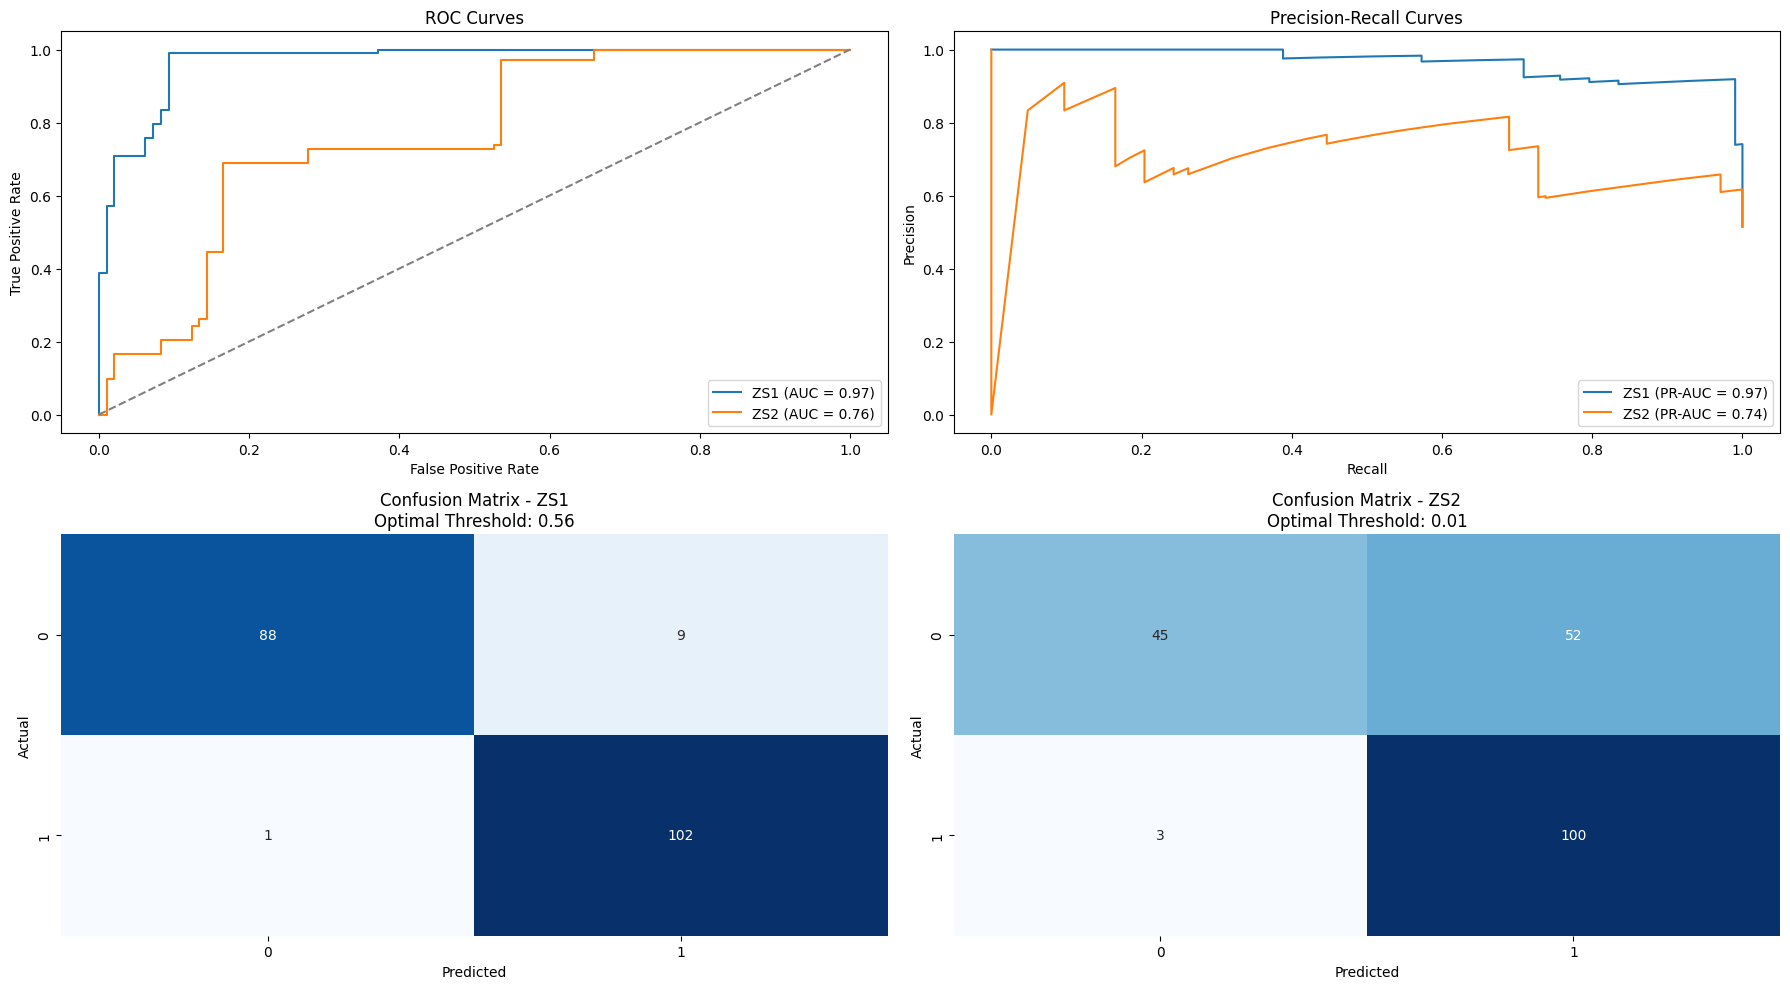

In [6]:
from FewShotX.scoring.eval_plots import evaluate_predictions

evaluate_predictions(
    y_true=scored_df2["is_financial"], 
    ZS1=scored_df2["is_financial_zs1"], 
    ZS2=scored_df2["is_financial_zs2"]
)

In [7]:
# False Positives
scored_df2[(scored_df2["is_financial"] == 0) & (scored_df2["pred_zs1"] == 1)]

,date,headline,category,is_financial,is_financial_zs1,is_financial_zs2,pred_zs1,pred_zs2
0,2022-01-01,Traffic Congestion Worsens in Capital,Neutral,0,0.600607,0.044255,1,1
46,2022-12-05,Farmers' Market Expands to New Locations,Neutral,0,0.579003,0.048803,1,1
55,2023-03-06,Sports League Implements New Revenue Sharing M...,Neutral,0,0.628100,0.022482,1,1
90,2023-08-14,Lawmakers push for increased funding in educat...,Neutral,0,0.604203,0.000330,1,0
105,2023-11-08,University Launches Campaign to Attract High-I...,Neutral,0,0.597500,0.258828,1,1
126,2024-02-09,Activists call for wage reforms amid rising li...,Neutral,0,0.602053,0.206092,1,1
128,2024-02-14,New coach implements strict budgeting for play...,Neutral,0,0.643089,0.847157,1,1
174,2024-11-10,Public Library Launches Free Financial Literac...,Neutral,0,0.598520,0.900541,1,1
178,2024-12-19,City Implements New Parking Fees to Reduce Tra...,Neutral,0,0.601817,0.501700,1,1


## 2. Building a Business Confidence Indicator (BCI)

In [8]:
from FewShotX.scoring.zeroshot import ZeroShotNLI

zs2 = ZeroShotNLI()
labels = ["Positive business confidence", 
          "Neutral business confidence",
          "Negative business confidence"]
scored_df3 = zs2.score_df(scored_df1, text_col="headline", labels=labels, label_names=["positive", "neutral", "negative"])
scored_df3

Scoring with ZeroShotNLI: 100%|██████████| 200/200 [00:53<00:00,  3.72it/s]


,date,headline,category,is_financial,is_financial_zs1,positive,neutral,negative
0,2022-01-01,Traffic Congestion Worsens in Capital,Neutral,0,0.600607,0.050659,0.119644,0.829697
1,2022-01-04,Government Releases Latest Industrial Output Data,Neutral,1,0.563480,0.517498,0.272950,0.209552
2,2022-02-03,Private Investment in Renewable Energy Increases,Positive,1,0.655326,0.791131,0.198427,0.010442
3,2022-02-04,Economic Uncertainty Dampens Private Investmen...,Negative,1,0.688207,0.005952,0.172151,0.821898
4,2022-02-05,Job creation exceeded expectations in the thir...,Positive,1,0.565637,0.847587,0.121590,0.030823
...,...,...,...,...,...,...,...,...
195,2025-04-03,Local School Hosts Annual Sports Day,Neutral,0,0.498189,0.322812,0.534911,0.142277
196,2025-04-04,Research lab secures funding for groundbreakin...,Neutral,0,0.559171,0.640038,0.343174,0.016787
197,2025-04-15,Investors show growing confidence in emerging ...,Positive,1,0.621988,0.929048,0.057786,0.013165
198,2025-04-17,Private Investment in Renewable Energy Slumps,Negative,1,0.649374,0.005286,0.116421,0.878293


In [9]:
# Parameters
threshold_zs1 = 0.5635  # Optimal threshold based on F1 score
weights = {"positive": 1, "neutral": 0.0, "negative": -1}

# Predict Financial/Economic Relevance
scored_df3['date'] = pd.to_datetime(scored_df3['date'])
scored_df3['pred_zs1'] = (scored_df3['is_financial_zs1'] >= threshold_zs1).astype(int)

# Determine Sentiment Score for Each Headline
scored_df3['max_sentiment'] = scored_df3[['positive', 'neutral', 'negative']].idxmax(axis=1)
# Assign sentiment score using weights
scored_df3['sentiment_score'] = scored_df3.apply(lambda row: row[row['max_sentiment']] * weights[row['max_sentiment']], axis=1) 
scored_df3

,date,headline,category,is_financial,is_financial_zs1,positive,neutral,negative,pred_zs1,max_sentiment,sentiment_score
0,2022-01-01,Traffic Congestion Worsens in Capital,Neutral,0,0.600607,0.050659,0.119644,0.829697,1,negative,-0.829697
1,2022-01-04,Government Releases Latest Industrial Output Data,Neutral,1,0.563480,0.517498,0.272950,0.209552,0,positive,0.517498
2,2022-02-03,Private Investment in Renewable Energy Increases,Positive,1,0.655326,0.791131,0.198427,0.010442,1,positive,0.791131
3,2022-02-04,Economic Uncertainty Dampens Private Investmen...,Negative,1,0.688207,0.005952,0.172151,0.821898,1,negative,-0.821898
4,2022-02-05,Job creation exceeded expectations in the thir...,Positive,1,0.565637,0.847587,0.121590,0.030823,1,positive,0.847587
...,...,...,...,...,...,...,...,...,...,...,...
195,2025-04-03,Local School Hosts Annual Sports Day,Neutral,0,0.498189,0.322812,0.534911,0.142277,0,neutral,0.000000
196,2025-04-04,Research lab secures funding for groundbreakin...,Neutral,0,0.559171,0.640038,0.343174,0.016787,0,positive,0.640038
197,2025-04-15,Investors show growing confidence in emerging ...,Positive,1,0.621988,0.929048,0.057786,0.013165,1,positive,0.929048
198,2025-04-17,Private Investment in Renewable Energy Slumps,Negative,1,0.649374,0.005286,0.116421,0.878293,1,negative,-0.878293


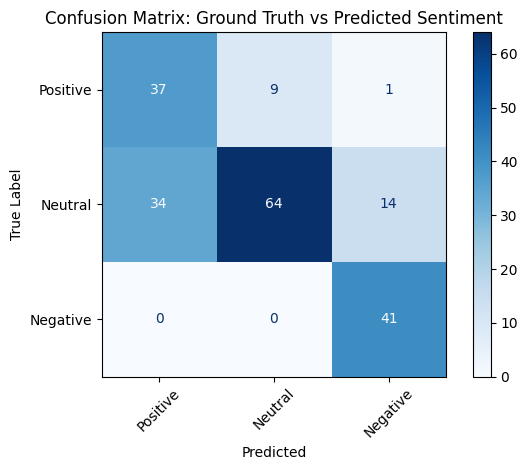

In [10]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

# Ensure the strings are lowercase
scored_df3['category'] = scored_df3['category'].str.lower()
scored_df3['max_sentiment'] = scored_df3['max_sentiment'].str.lower()

# Confusion matrix
cm = confusion_matrix(scored_df3['category'], scored_df3['max_sentiment'], labels=["positive", "neutral", "negative"])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Neutral", "Negative"])
disp.plot(cmap="Blues", colorbar=True)
disp.ax_.set_title("Confusion Matrix: Ground Truth vs Predicted Sentiment")
disp.ax_.set_xlabel("Predicted")
disp.ax_.set_ylabel("True Label")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# Filter only financial/economic headlines
financial_df = scored_df3[scored_df3['pred_zs1'] == 1].copy()
financial_df['date'] = financial_df['date'].dt.to_period('M')

# Monthly BCI as the mean of sentiment scores
monthly_bci = financial_df.groupby('date')['sentiment_score'].mean()

# Ensure all months are included, initializing missing months with zero
all_months = pd.period_range(start=financial_df['date'].min(), end=financial_df['date'].max(), freq='M')
monthly_bci = monthly_bci.reindex(all_months, fill_value=0)

# Normalize BCI (optional, for standardization)
monthly_bci = (monthly_bci - monthly_bci.mean()) / monthly_bci.std()
monthly_bci = monthly_bci.reset_index().rename(columns={'index': 'date', 'sentiment_score': 'BCI'})
monthly_bci.head()

,date,BCI
0,2022-01,-1.350018
1,2022-02,-0.011611
2,2022-03,-1.448074
3,2022-04,1.497244
4,2022-05,-0.809210


## Business confidence and private investment

In [12]:
df_investment = pd.read_parquet("datasets/econland_investment.parquet")
df_investment['investment_growth'] = df_investment['investment_growth'] * 100
df_merge = pd.merge(monthly_bci, df_investment, on="date", how="left")
df_merge.head()

,date,BCI,investment_growth
0,2022-01,-1.350018,2.000000
1,2022-02,-0.011611,3.593428
2,2022-03,-1.448074,3.598214
3,2022-04,1.497244,-2.326052
4,2022-05,-0.809210,9.685218


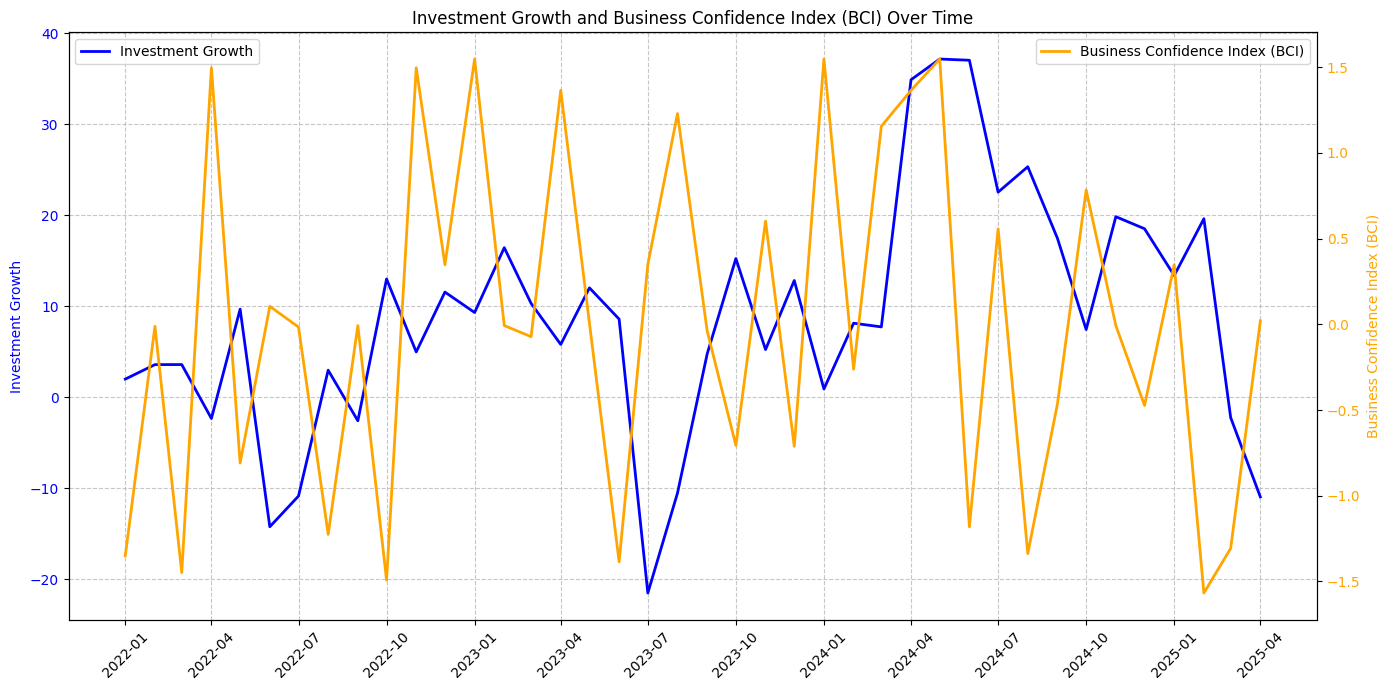

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Set the date as the index for plotting
df_merge['date'] = df_merge['date'].dt.to_timestamp()
df_merge.set_index('date', inplace=True)

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the investment growth
ax1.plot(df_merge.index, df_merge['investment_growth'], color='blue', label='Investment Growth', linewidth=2)
ax1.set_ylabel('Investment Growth', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Create a second y-axis for the BCI
ax2 = ax1.twinx()
ax2.plot(df_merge.index, df_merge['BCI'], color='orange', label='Business Confidence Index (BCI)', linewidth=2)
ax2.set_ylabel('Business Confidence Index (BCI)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

ax1.grid(True, which='both', linestyle='--', alpha=0.7)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Investment Growth and Business Confidence Index (BCI) Over Time')
plt.tight_layout()
plt.show()

# Forecasting with text as data

We will:

+ Expore if BCI is a lead or lag variable of investment.
+ Estimate a benchmark time series model: AR(1).
+ Evaluate performance in a rolling window setting.

## 2.1 Dynamic correlations

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def dynamic_correlation_plot(df, fix_var, dyn_var, max_lag=8):
    """
    Plot dynamic linear correlation between a fixed and a dynamic variable over varying lags.
    """
    correlations = []
    lags = range(max_lag, -(max_lag+1), -1)

    for lag in lags:
        # Shift variable
        shifted_bci = df[dyn_var].shift(lag)
        # Compute correlation, dropping NaN values
        corr = df[fix_var].corr(shifted_bci)
        correlations.append(corr)

    # Identify the maximum correlation and corresponding lag
    max_corr_idx = np.argmax(np.abs(correlations))
    best_lag = lags[max_corr_idx]
    best_corr = correlations[max_corr_idx]

    # Plot
    plt.figure(figsize=(6, 4))
    plt.plot(lags, correlations, marker='o', linestyle='-', label='Correlation')
    plt.axvline(x=best_lag, color='red', linestyle='--', label=f'Max Corr Lag: {best_lag} (Corr: {best_corr:.2f})')
    plt.title("Dynamic Correlation")
    plt.xlabel("Lag (periods)")
    plt.ylabel("Correlation")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Interpretation
    if best_lag < 0:
        print(f"The dynamic variable '{dyn_var}' lags the fixed variable '{fix_var}' by {abs(best_lag)} periods. Max correlation: {best_corr:.2f}")
    elif best_lag > 0:
        print(f"The dynamic variable '{dyn_var}' leads the fixed variable '{fix_var}' by {best_lag} periods. Max correlation: {best_corr:.2f}")
    else:
        print(f"The dynamic variable '{dyn_var}' and the fixed variable '{fix_var}' are synchronized with a correlation of {best_corr:.2f}.")

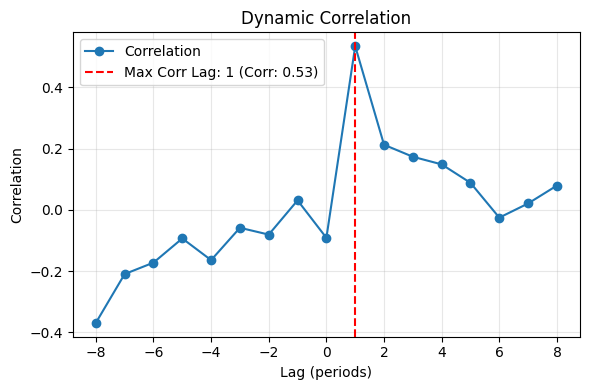

The dynamic variable 'BCI' leads the fixed variable 'investment_growth' by 1 periods. Max correlation: 0.53


In [15]:
dynamic_correlation_plot(df_merge.copy(), 'investment_growth', 'BCI', max_lag=8)

## 2.2 Estimate an AR(1) model for forecasting

In [16]:
# Extract the dependent variable (Y)
lags = 1
train_data = df_merge.copy()
Y = train_data['investment_growth'].values[lags:].reshape(-1, 1)
print("Y matrix: \n", Y)

Y matrix: 
 [[  3.59342831]
 [  3.59821404]
 [ -2.32605169]
 [  9.68521836]
 [-14.22013206]
 [-10.84437956]
 [  2.98292198]
 [ -2.57879296]
 [ 12.99801686]
 [  4.98353358]
 [ 11.55999148]
 [  9.31653367]
 [ 16.43715148]
 [ 10.3231607 ]
 [  5.80869289]
 [ 12.02237926]
 [  8.59224116]
 [-21.4977124 ]
 [-10.51421807]
 [  4.76401814]
 [ 15.24251205]
 [  5.24245704]
 [ 12.82902204]
 [  0.91372126]
 [  8.14221156]
 [  7.73561443]
 [ 34.88650439]
 [ 37.16059955]
 [ 37.02720226]
 [ 22.53837431]
 [ 25.32728622]
 [ 17.46638535]
 [  7.44611383]
 [ 19.8414692 ]
 [ 18.51826519]
 [ 13.37292485]
 [ 19.61606707]
 [ -2.22648659]
 [-10.93756137]]


In [17]:
# Extract the lagged variable (X)
X = np.array([train_data['investment_growth'].shift(i).dropna().values for i in range(1, lags + 1)]).T
# Add constant (intercept) column
X = np.hstack((np.ones_like(X[:, 0]).reshape(-1, 1), X))
print("X matrix: \n", X)

X matrix: 
 [[  1.           2.        ]
 [  1.           3.59342831]
 [  1.           3.59821404]
 [  1.          -2.32605169]
 [  1.           9.68521836]
 [  1.         -14.22013206]
 [  1.         -10.84437956]
 [  1.           2.98292198]
 [  1.          -2.57879296]
 [  1.          12.99801686]
 [  1.           4.98353358]
 [  1.          11.55999148]
 [  1.           9.31653367]
 [  1.          16.43715148]
 [  1.          10.3231607 ]
 [  1.           5.80869289]
 [  1.          12.02237926]
 [  1.           8.59224116]
 [  1.         -21.4977124 ]
 [  1.         -10.51421807]
 [  1.           4.76401814]
 [  1.          15.24251205]
 [  1.           5.24245704]
 [  1.          12.82902204]
 [  1.           0.91372126]
 [  1.           8.14221156]
 [  1.           7.73561443]
 [  1.          34.88650439]
 [  1.          37.16059955]
 [  1.          37.02720226]
 [  1.          22.53837431]
 [  1.          25.32728622]
 [  1.          17.46638535]
 [  1.           7.44611383]
 [

In [18]:
# Number of rows in X
T = X.shape[0]
print('# Observations of Y: ', Y.shape[0])
print('# Observations of X: ', T)

# Observations of Y:  39
# Observations of X:  39


In [19]:
# OLS 
b0 = np.linalg.inv(X.T @ X) @ (X.T @ Y)
b0

array([[3.21844688],
       [0.61299401]])

## Rolling forecast

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

def ar_forecast_with_lags(df, start_date, end_date, lags=1, exog_variable=None):
    """
    Perform AR forecasting with specified number of lags and an optional exogenous variable.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    start_date (str): Start date of the forecast period in 'YYYY-MM' format.
    end_date (str): End date of the forecast period in 'YYYY-MM' format.
    lags (int): Number of lags to use in the AR model (default is 1).
    exog_variable (str or None): The name of the exogenous variable to include in the model (default is None).
    
    Returns:
    pd.DataFrame: DataFrame containing the forecasts.
    """
    
    # Ensure the date column is datetime and sorted
    if not pd.api.types.is_datetime64_any_dtype(df['date']):
        raise TypeError("The 'date' column must be a datetime type.")

    df = df.sort_values('date').reset_index(drop=True)

    # Initialize an empty list for predictions
    predictions = []

    # Iterate over the forecast period
    for forecast_period in pd.period_range(start=start_date, end=end_date, freq='M'):
        # Convert the Period object to a Timestamp object
        forecast_date = forecast_period.to_timestamp()

        # Define the training window
        train_data = df[df['date'] <= forecast_date]
        
        # Ensure we have sufficient data points for estimation
        if len(train_data) < lags + 1:
            print(f"Insufficient data for {forecast_date}. Skipping.")
            continue

        # Extract the dependent variable (Y)
        Y = train_data['investment_growth'].values[lags:].reshape(-1, 1)

        # Extract the lagged variable (X)
        X = np.array([train_data['investment_growth'].shift(i).dropna().values for i in range(1, lags + 1)]).T

        # Include exogenous variable if specified
        if exog_variable:
            # Ensure the exog variable has the correct number of observations
            exog_data = train_data[exog_variable].shift(1).dropna().values.reshape(-1, 1)
            if len(exog_data) == len(X):
                X = np.hstack([X, exog_data])
            else:
                print(f"Exog variable length mismatch at {forecast_date}. Skipping.")
                continue

        # Add constant (intercept) column
        X = np.hstack((np.ones_like(X[:, 0]).reshape(-1, 1), X))

        # Estimate OLS parameters
        try:
            b0 = np.linalg.inv(X.T @ X) @ (X.T @ Y)
        except np.linalg.LinAlgError:
            print(f"Singular matrix error at {forecast_date}. Skipping.")
            continue

        # Extract the most recent observation for forecasting
        last_obs = train_data['investment_growth'].iloc[-1]
        X_forecast = np.array([1] + [last_obs] * lags)

        if exog_variable:
            # Include the latest exog value if specified
            exog_value = train_data[exog_variable].iloc[-1]
            X_forecast = np.hstack([X_forecast, exog_value])

        X_forecast = X_forecast.reshape(1, -1)

        # Forecast one step ahead
        forecast = X_forecast @ b0

        # Store the prediction as a dictionary
        # apprend predictions for "date" the forecast_date + 1 month:
        predictions.append({
            'date': forecast_date + pd.offsets.MonthBegin(1),
            'forecast': forecast.item()  # Extract scalar value
        })

    # Convert to DataFrame
    predictions_df = pd.DataFrame(predictions)

    # Merge the predictions back to the original dataset
    df = df.merge(predictions_df, on='date', how='left')

    return df

def plot_forecasts(df_actual, df_forecast_1, df_forecast_2):
    """
    Plot actual vs. predicted values for two different forecasts.
    
    Parameters:
    df_actual (pd.DataFrame): DataFrame containing actual values.
    df_forecast_1 (pd.DataFrame): DataFrame containing first forecast values (e.g., AR(1) without BCI).
    df_forecast_2 (pd.DataFrame): DataFrame containing second forecast values (e.g., AR(1) with BCI).
    """
    plt.figure(figsize=(12, 6))
    plt.plot(df_actual['date'], df_actual['investment_growth'], label='Actual', color='black', linestyle='--', linewidth=2)
    plt.plot(df_forecast_1['date'], df_forecast_1['forecast'], label='AR(1) Forecast', color='blue', linestyle='-', linewidth=2)
    plt.plot(df_forecast_2['date'], df_forecast_2['forecast'], label='AR(1) with BCI Forecast', color='red', linestyle='-', linewidth=2)
    plt.xlabel('Date')
    plt.ylabel('Investment Growth')
    plt.title('Actual vs. Forecasted Investment Growth')
    plt.legend()
    plt.grid(True)
    plt.show()

def calculate_metrics(df_actual, df_forecast):
    """
    Calculate RMSE and MAE between actual and forecasted values.

    Parameters:
    df_actual (pd.DataFrame): DataFrame containing actual values.
    df_forecast (pd.DataFrame): DataFrame containing forecasted values.

    Returns:
    dict: Dictionary containing RMSE and MAE.
    """
    
    # Merge actual and forecast data
    df_merged = pd.merge(df_actual, df_forecast[['date', 'forecast']], on='date', how='left')
    
    # Drop rows with NaN values in the 'forecast' column
    df_merged = df_merged.dropna(subset=['forecast'])
    
    # Calculate RMSE and MAE
    rmse = np.sqrt(mean_squared_error(df_merged['investment_growth'], df_merged['forecast']))
    mae = mean_absolute_error(df_merged['investment_growth'], df_merged['forecast'])

    return {'RMSE': rmse, 'MAE': mae}

def print_metrics(metrics_dict, title):
    """
    Print the metrics in a formatted manner.

    Parameters:
    metrics_dict (dict): Dictionary containing RMSE and MAE.
    title (str): Title for the metrics (e.g., "AR(1) without BCI").
    """
    print(f"\n{'=' * 50}")
    print(f"{title:^50}")
    print(f"{'=' * 50}")
    print(f"Root Mean Squared Error (RMSE): {metrics_dict['RMSE']:.4f}")
    print(f"Mean Absolute Error (MAE): {metrics_dict['MAE']:.4f}")
    print(f"{'=' * 50}\n")

In [21]:
# Ensure the date column is datetime and sorted
df_merge.reset_index(drop=False, inplace=True)
df_base = df_merge.copy()

In [22]:
# For AR(1) with BCI
df_without_bci = ar_forecast_with_lags(df_base, start_date="2023-01", end_date="2025-04", lags=1)

# For AR(1) with BCI
df_with_bci = ar_forecast_with_lags(df_base, start_date="2023-01", end_date="2025-04", lags=1, exog_variable="BCI")

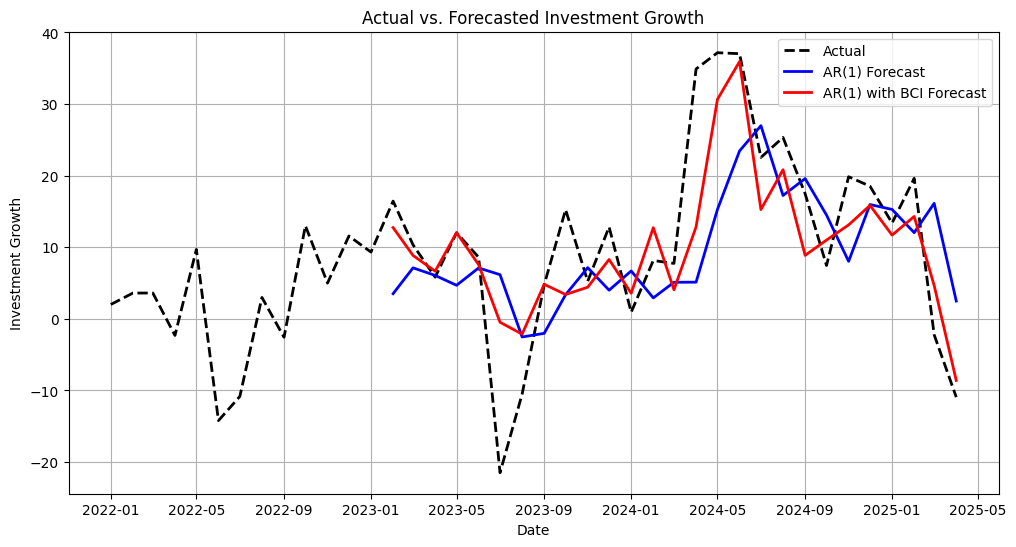

In [23]:
# Plot both forecasts with actual values
plot_forecasts(df_base, df_without_bci, df_with_bci)

In [24]:
# Calculate metrics for both forecasts
metrics_without_bci = calculate_metrics(df_merge, df_without_bci)
metrics_with_bci = calculate_metrics(df_merge, df_with_bci)

print_metrics(metrics_without_bci, "AR(1) without BCI")
print_metrics(metrics_with_bci, "AR(1) with BCI")


                AR(1) without BCI                 
Root Mean Squared Error (RMSE): 11.8827
Mean Absolute Error (MAE): 9.1280


                  AR(1) with BCI                  
Root Mean Squared Error (RMSE): 7.5988
Mean Absolute Error (MAE): 5.3284

